In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [77]:
d=pd.read_csv("C:\\Users\\bramhad\\OneDrive - Konecranes Plc\\Desktop\\Data Science\\ExcelR\\Assignments\\5_Multi Linear Regression\\50_Startups.csv")
d

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Explolatary Data Analysis (EDA)

In [78]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As there are no null values , we can use all the data at the primary stage of model building.

Feature names are so big so converting them into small names with rename 

In [79]:
d1=d.rename({"R&D Spend":"r","Administration":"a" ,"Marketing Spend":"ms","State":"s","Profit":"p"},axis=1)
d1

,r,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [80]:
d1[d1.duplicated()]

,r,a,ms,s,p


No Duplicate values are present

In [81]:
d1.describe()

,r,a,ms,p
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Correlation Analysis

In [82]:
d1.corr()

,r,a,ms,p
r,1.000000,0.241955,0.724248,0.972900
a,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
p,0.972900,0.200717,0.747766,1.000000


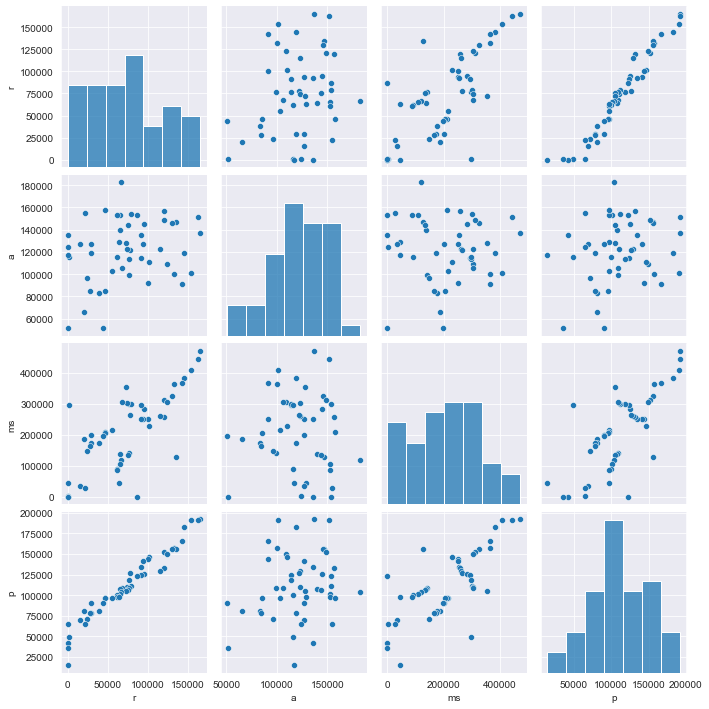

In [83]:
sns.set_style(style='darkgrid')
sns.pairplot(d1)

1st Model buliding with all 3 prectior varibales r,a,ms

In [84]:
m=smf.ols("p~a+r+ms",data=d1).fit()

In [85]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        09:30:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
a             -0.0268      0.051     -0.526      0.602      -0.130       0.076
r              0.8057      0.045     17.846      0.000       0.715       0.897
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At present model accuracy is 94.8 % taken from adj. R sqaured value from the summary

Also for a and ms p values are greater than alpha values so we have to take care for these 2 features now.

# Creating single variable linear regression model with a and ms with p

In [86]:
a1=smf.ols("p~a",data=d1).fit()
a1.tvalues , a1.pvalues

(Intercept    3.040044
 a            1.419493
 dtype: float64,
 Intercept    0.003824
 a            0.162217
 dtype: float64)

Here again p value is greater than alpha so this is not significant feature for model buliding 

In [87]:
ms1=smf.ols("p~ms",data=d1).fit()
ms1.tvalues , ms1.pvalues

(Intercept    7.808356
 ms           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 ms           4.381073e-10
 dtype: float64)

Here again p value is lesser than alpha so this is significant feature for model buliding

In [88]:
msa1=smf.ols("p~ms+a",data=d1).fit()
msa1.tvalues , msa1.pvalues

(Intercept    1.142741
 ms           8.281039
 a            2.467779
 dtype: float64,
 Intercept    2.589341e-01
 ms           9.727245e-11
 a            1.729198e-02
 dtype: float64)

But with combination of these two it is giving lesser value for the p value than alpha so we can't simple ignore this.

## Model Validation
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

with VIF

In [89]:
rsq_r=smf.ols("r~a+ms",data=d1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("a~r+ms",data=d1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("ms~a+r",data=d1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
dv={'Variables':['r','a','ms'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(dv)
Vif_df

,Variables,Vif
0,r,2.468903
1,a,1.175091
2,ms,2.326773


All the Vif values are within our limits like less than 5 so there is no collinearity that means these all are independent features and all need to take in for model buliding

Residual Analysis

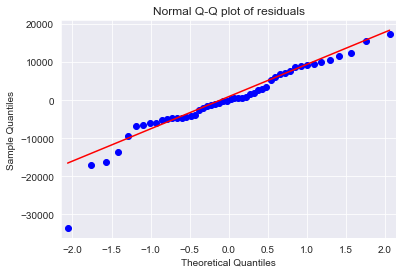

In [90]:
sm.qqplot(m.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [91]:
list(np.where(m.resid<-30000))

[array([49], dtype=int64)]

Test for Homoscedasticity or Heteroscedasticity (standardized fitted values vs standardized residual values)



In [92]:
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()  

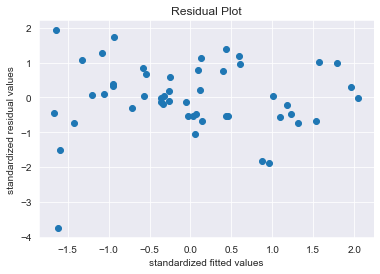

In [93]:
plt.scatter(standard_values(m.fittedvalues),standard_values(m.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

## Residuals Vs Regressors

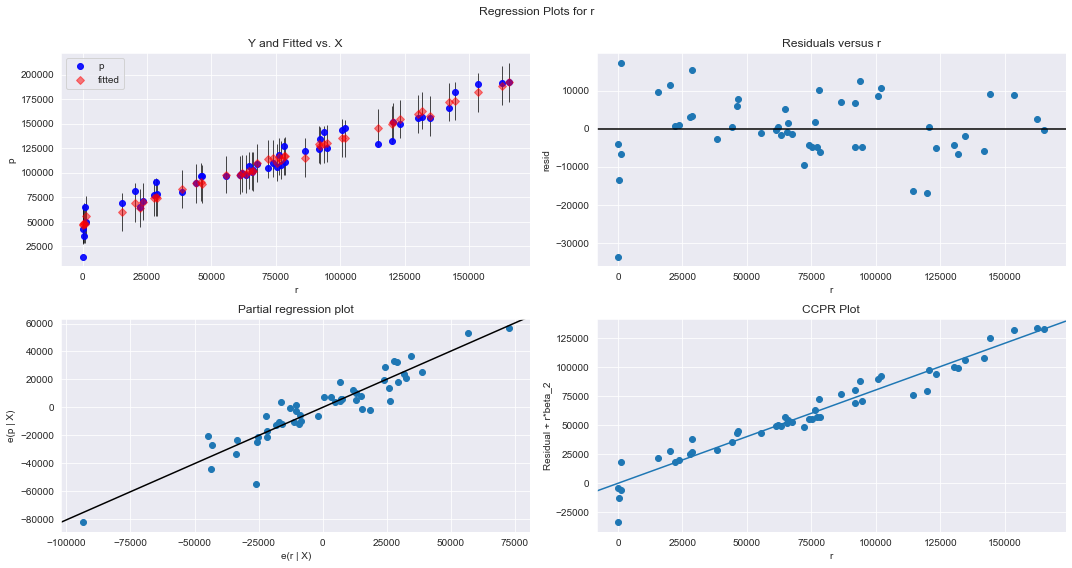

In [94]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m,'r',fig=fig)
plt.show()

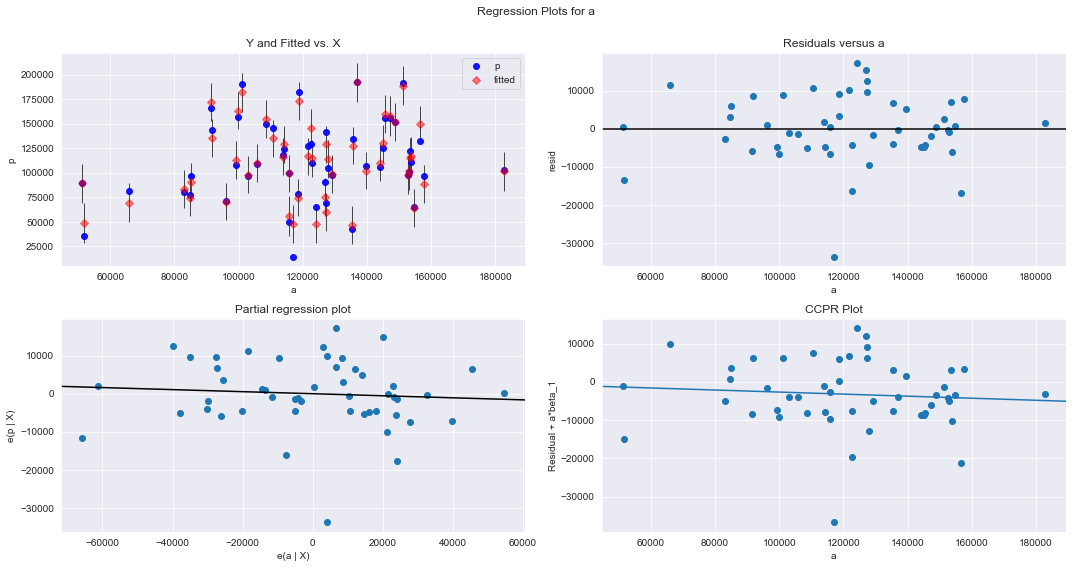

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m,'a',fig=fig)
plt.show()

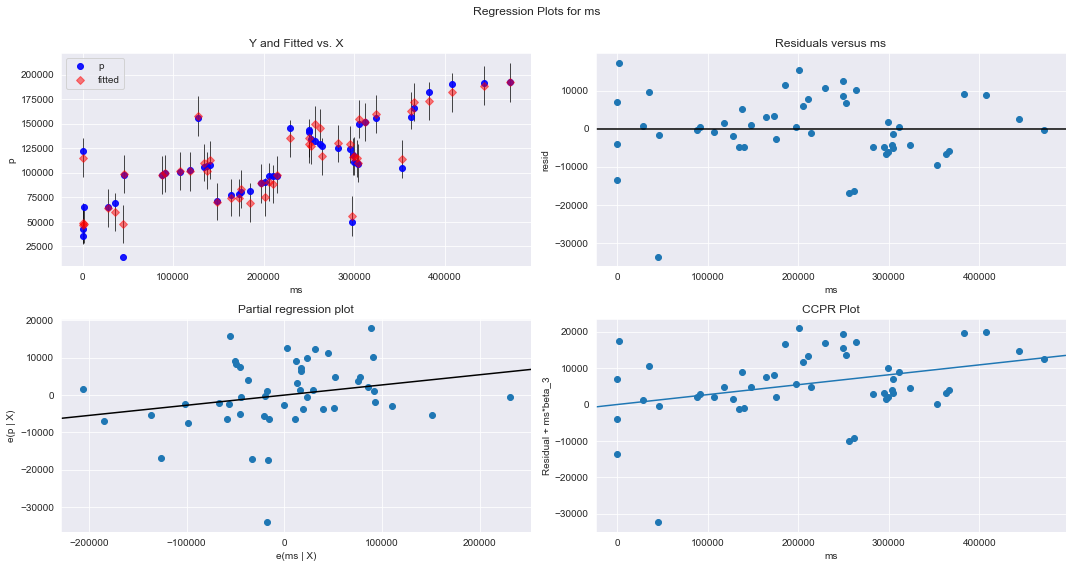

In [96]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m,'ms',fig=fig)
plt.show()

## Outliers or Influencers if not neccesary then removing these to increase the model accuracy

In [97]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=m.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

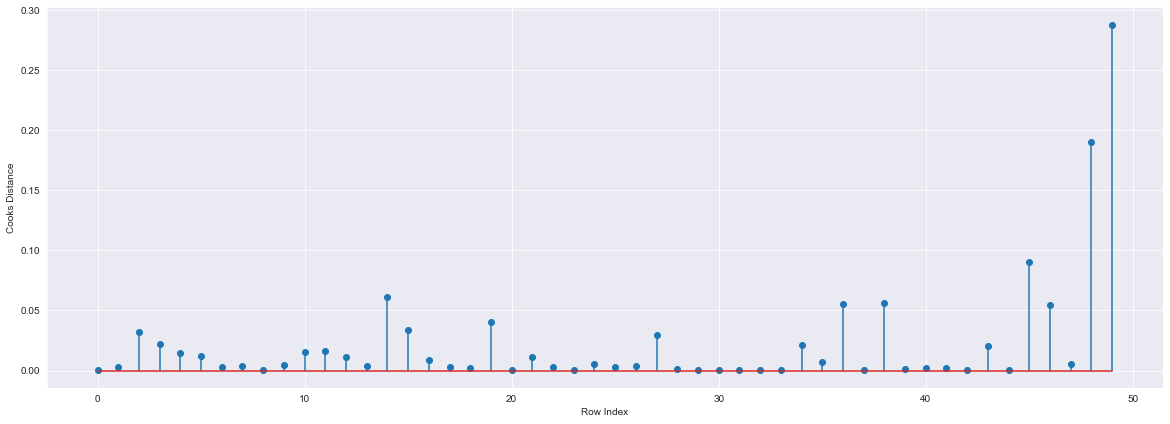

In [98]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(d1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [99]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

This means that 49th row is having outlier or influencer

Now plotting the influence plot the data

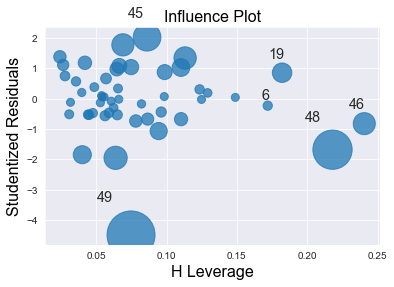

In [100]:
influence_plot(m)
plt.show()

In [101]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=d1.shape[1]
n=d1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

Now deleting the 49th row and making new dataframe with name d2

In [102]:
d2=d1.drop(d1.index[[49]],axis=0).reset_index(drop=True)
d2

,r,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Revised final model with m2 name

In [103]:
m2=smf.ols("p~r+a+ms",data=d2).fit()

In [104]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.85e-32
Time:                        09:30:36   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
r              0.7830      0.038     20.470      0.000       0.706       0.860
a             -0.0222      0.043     -0.518      0.607      -0.109       0.064
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can clearly see here adj. R sqaured value is now 95.9 means our model is 95.9 % accurate . In model m1 it was 94.8% accurate so accuracy is increased

## Predicting the model by passing some values through a data frame

In [106]:
new_d=pd.DataFrame({"r":65000,"a":85000,"ms":135000},index=[0])
new_d

,r,a,ms
0,65000,85000,135000


In [107]:
m2.predict(new_d)

0    104796.984104
dtype: float64

Table containing R squared values for m1 and m2 model

In [110]:
dr={'Prepared model':['Model1','Model2'], 'Rsqaured':[m.rsquared,m2.rsquared]}
t=pd.DataFrame(dr)
t

,Prepared model,Rsqaured
0,Model1,0.950746
1,Model2,0.961316
